### 循环

python

In [1]:
import random 

def average_py(n):
    s = 0
    for i in range(n):
        s += random.random()
    return s / n

n = 1000000
%time average_py(n)

%time sum([random.random() for i in range(n)]) / n

CPU times: total: 109 ms
Wall time: 111 ms
CPU times: total: 156 ms
Wall time: 183 ms


0.4999156215760483

Numpy

In [2]:
import numpy as np

def average_np(n):
    s = np.random.random(n)
    return s.mean()

n = 1000000
%time average_np(n)


CPU times: total: 15.6 ms
Wall time: 11 ms


0.5003872253482846

Numba

In [3]:
import numba

average_nb = numba.jit(average_py)          # 使用Numba库的jit装饰器来加速你的average_py函数的执行

%time average_nb(n)

%time average_nb(n)                         # 第二次执行会更快

C:\Users\ORANGE\AppData\Local\Temp\ipykernel_20572\2044691674.py:3: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  average_nb = numba.jit(average_py)          # 使用Numba库的jit装饰器来加速你的average_py函数的执行


CPU times: total: 688 ms
Wall time: 1.02 s
CPU times: total: 0 ns
Wall time: 6.98 ms


0.499357686644161

Cython

In [4]:
%load_ext Cython

%%cython -a

import random

def average_cy1(int n):
    cdef int i
    cdef float s = 0.0
    for i in range(n):
        s += rand()
    return s / n

SyntaxError: invalid syntax (3126439620.py, line 7)

### 算法

#### 质数

python

In [ ]:
def is_prime(I):
    if I%2 == 0:
        return False
    for i in range(3, int(I**0.5)+1, 2):        # 循环从3开始，直到I的平方根+1，步长为2。
        if I%i == 0:
            return False
    return True

n = int(1e8 + 3)
print(is_prime(n))

p1 = int(1e8 + 7)
print(is_prime(p1))

%timeit is_prime(p1)

False
True
373 µs ± 47.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Numba

In [ ]:
is_prime_nb = numba.jit(is_prime)

%timeit is_prime_nb(p1)

C:\Users\ORANGE\AppData\Local\Temp\ipykernel_1360\1981683640.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  is_prime_nb = numba.jit(is_prime)


18.7 µs ± 387 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Cython

In [ ]:
%load_ext cython
def is_prime_cy1(I):
    if I%2 == 0:
        return False
    for i in range(3, int(I**0.5)+1, 2):
        if I%i == 0:
            return False
    return True

%timeit is_prime_cy1(p1)

313 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
def is_prime_cy2(long I):               # 这种变量定义方式long I，long i是针对于Cython的
    cdef long i                         # cdef 关键字是针对 Cython 语言的，而不是 Python。Python 的原生版本不支持这个关键字
    if I%2 == 0:
        return False
    for i in range(3, int(I**0.5)+1, 2):
        if I%i == 0:
            return False
    return True

%timeit is_prime_cy2(p1)

SyntaxError: invalid syntax (137555112.py, line 1)

多进程

In [ ]:
import multiprocessing as mp

pool = mp.Pool(processes=4)         # 将mp.Pool对象实例化为多进程

%time pool.map(is_prime, 10*[p1])       # 跑不出来

#### 斐波那契数

从两个1开始，第3个数（下一个斐波那契数）是前两个数的和：1，1，2，3，5，8，13，21，…

递归算法

In [ ]:
def fib_rec_py1(n):
    if n < 2:
        return n 
    else:
        return fib_rec_py1(n-1) + fib_rec_py1(n-2)

%time fib_rec_py1(35)

# fib_rec_nb = numba.jit(fib_rec_py1)

# %time fib_rec_nb(35)

CPU times: total: 2.3 s
Wall time: 2.31 s


9227465

递归算法的主要问题是中间结果不会缓存，而是重新计算。为了避免出现这种特有的问题，可以使用一个装饰器（decorator）来负责缓存中间结果。它可以将执行速度提高好几个数量级

In [ ]:
from functools import lru_cache as cache

@cache(maxsize=None)                
    # @cache 装饰器通常用于缓存函数的结果，以便在后续的调用中节省计算或IO的时间。maxsize 参数决定了缓存的大小。如果设置为 None，那么缓存的大小将没有限制，所有的结果都会被缓存
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n-1) + fib_rec_py2(n-2)

%time fib_rec_py2(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

循环（迭代）算法

In [ ]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n+1):
        x, y = y, x+y
    return x

%time fib_it_py(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

自己写了一个循环来生成斐波那契数列表，并且能控制列表长度

In [ ]:
list = []
def fb_function(e):
    a1 = 1
    list.append(a1)
    a2 = 1
    list.append(a2)
    i = 3
    while (i>2 and i<e) :
        ai = list[i-2] + list[i-3]
        list.append(ai)
        i += 1

fb_function(100)
%time list[34]



CPU times: total: 0 ns
Wall time: 0 ns


9227465

#### Π

基于蒙特卡洛模拟的Π值求取算法

In [5]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

(-1.1, 1.1)

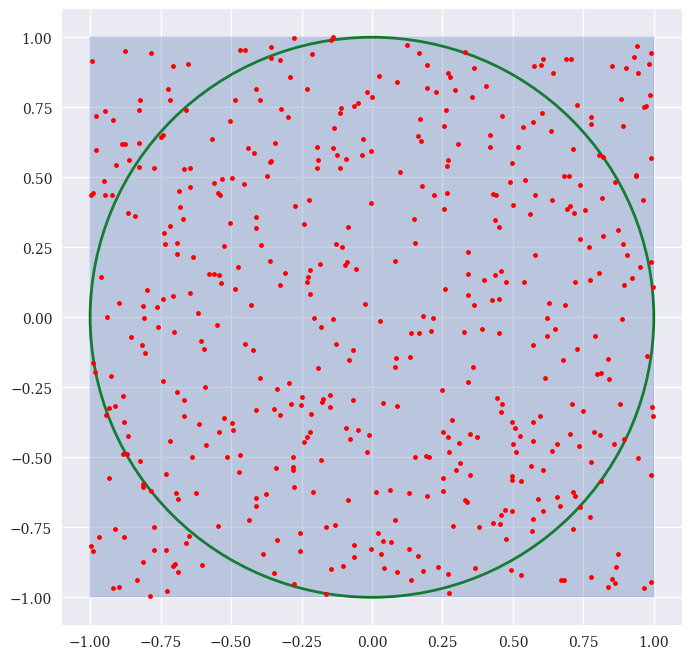

In [ ]:
rn = [(random.random()*2-1, random.random()*2-1) for i in range(500)]
    # random.random()会返回一个[0,1)范围内的随机浮点数。
    # random.random()*2-1则将这个范围扩大到[-1,1)。
rn = np.array(rn)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0,0), radius=1, edgecolor='g', linewidth=2.0, facecolor='None')
    # 原点（0，0），半径为1的圆
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
    # (x, y): 矩形的中心坐标；width: 矩形的宽度；height: 矩形的高度。长方形从左下向右上画图
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'r.')
# plt.scatter(rn[:, 0], rn[:, 1], marker='.',color='r', alpha=1)
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [ ]:
n = int(1e7)
rn = np.random.random((n, 2))*2-1
distance = np.sqrt((rn**2).sum(axis=1))     # 每个点与原点的距离——欧几里得范数
fac = (distance <= 1.0).sum() / len(distance)   
    # 在布尔数组中，True被视为1，False被视为0，所以.sum()函数实际上是计算distance中小于等于1.0的元素数量。
pi_mcs = fac * 4       # 这个比例乘以正方形面积 4 就是圆面积的估算值，即π值。
pi_mcs

3.1408572

In [ ]:
def mcs_pi_py(n):
    circle = 0
    for i in range(n):
        x, y = random.random(), random.random()
        if (x**2 + y**2)**0.5 <= 1.0:
            circle += 1
    return (4*circle)/n

n = int(1e7)
mcs_pi_py(n)

3.1416272

### 二叉树

二项式期权定价模型——以一颗（重组）树来表示某种资产可能的未来发展

python

In [1]:
import math
import numpy as np

S0 = 36                     # 风险资产初始价值
T = 1.0                     # 二叉树模拟的时间范围
r = 0.06                    # 恒定的短期利率
sigma = 0.2                 # 恒定的波动率因数

def simulate_tree(M):
    dt = T / M              # 时间间隔
    u = math.exp(sigma * math.sqrt(dt))     
    d = 1 / u
        # u,d为向上和向下运动因素
    S = np.zeros((M+1, M+1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M+1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

np.set_printoptions(formatter={'float': lambda x: '%6.2f'%x})
simulate_tree(4)            # 4个时间间隔的树

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [ ]:
simulate_tree(500)

array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

Numpy

In [7]:
M = 4
up = np.arange(M+1)
up = np.resize(up, (M+1, M+1))
down = up.T * 2 
dt = T / M
S0 * np.exp(sigma * math.sqrt(dt) * (up-down))

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [8]:
def simulate_tree_np(M):
    up = np.arange(M+1)
    up = np.resize(up, (M+1, M+1))
    down = up.T * 2 
    dt = T / M
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up-down))
    return S

simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

Numba

In [9]:
simulate_tree_nb = numba.jit(simulate_tree)

simulate_tree_nb(4)

C:\Users\ORANGE\AppData\Local\Temp\ipykernel_20572\4022274777.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  simulate_tree_nb = numba.jit(simulate_tree)


array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

### 蒙特卡洛模拟
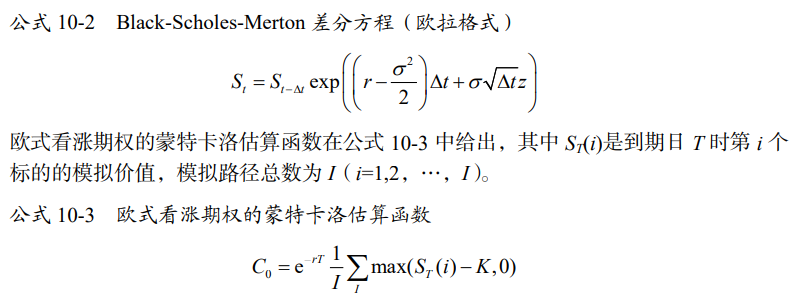

python

In [2]:
M = 100                         # 离散化的时间间隔数量
I = 50000                       # 模拟路径数量
S0 = 36

def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M+1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M+1):         # 实现基于欧拉公式模拟的嵌套循环
        for i in range(I):
            S[t, i] = S[t, i-1] * math.exp((r-sigma**2/2)*dt + sigma*math.sqrt(dt)*rn[t, i])
    return S

# S = mcs_simulation_py((M, I))
# S
%time S = mcs_simulation_py((M, I))

array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00]])

Numpy

In [16]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M 
    S = np.zeros((M+1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r-sigma**2/2)*dt + sigma*math.sqrt(dt)*rn[t])
            # 欧拉格式用向量化的Numpy带啊一次性处理所有路径，速度快了接近20倍
    return S

%time S = mcs_simulation_np((M, I))

CPU times: total: 203 ms
Wall time: 229 ms


Numba

In [19]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

%time S = mcs_simulation_nb((M, I))
%time S = mcs_simulation_nb((M, I))

C:\Users\ORANGE\AppData\Local\Temp\ipykernel_20572\4241117078.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  mcs_simulation_nb = numba.jit(mcs_simulation_py)


CPU times: total: 469 ms
Wall time: 465 ms
CPU times: total: 172 ms
Wall time: 182 ms


多进程

    方法之一是将 10 万条路径的模拟分为 10个并行的进程，每个进程模拟 1 万条路径。

    另一种方法是将 10 万条路径的模拟分在多个进程中，每个进程模拟不同的金融工具。

In [21]:
import multiprocessing as mp
pool = mp.Pool(processes=4)
p = 20

%timeit S = np.hstack(pool.map(mcs_simulation_np, p*[(M, int(I/p))]))   # 跑不出来

### pandas 递归算法
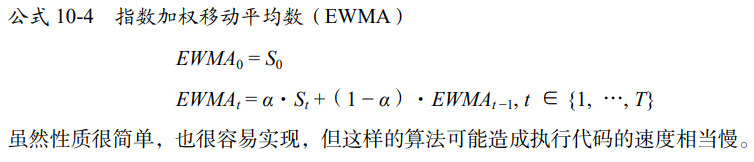


<Axes: xlabel='Date'>

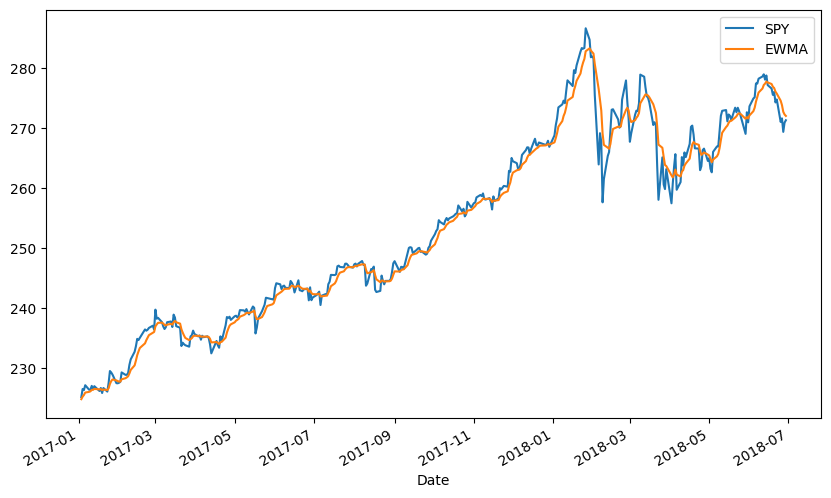

In [32]:
import pandas as pd
import numpy as np

sym = 'SPY'
file = pd.read_csv(r"C:\Users\ORANGE\Desktop\文件\software\pyhton\Finace for python\file\tr_eikon_eod_data.csv", index_col=0, parse_dates=True)
data = pd.DataFrame(file[sym]).dropna()         # file[sym]第一行是有标志的，会显示Date，SPY
alpha = 0.25
data['EWMA'] = data[sym]

for t in zip(data.index, data.index[1:]): 
    data.loc[t[1], 'EWMA'] = (alpha*data.loc[t[1], sym] + (1-alpha)*data.loc[t[0], 'EWMA'])
    # 使用了 zip(data.index, data.index[1:]) 来创建一个迭代器，这个迭代器产生的是包含相邻索引对的元组，例如 (0, 1)，(1, 2)，等等。


data[data.index > '2017-1-1'].plot(figsize=(10,6))

考虑更为通用的 Python 函数 ewma_py()。该函数可以直接应用于 ndarray 对象形式的金融时间序列数据中的某列或者某行上

In [34]:
def ewma_py(x, alpha):          # x 是一个 NumPy 数组
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha*x[i] + (1-alpha)*y[i-1]
    return y

%time data['EWMA_PY'] = ewma_py(data[sym], alpha)

%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)

CPU times: total: 15.6 ms
Wall time: 8.77 ms
CPU times: total: 0 ns
Wall time: 3.19 ms


Numba

In [39]:
import numba

ewma_nb = numba.jit(ewma_py)

%time data['EWMA_NB'] = ewma_nb(data[sym], alpha)


C:\Users\ORANGE\AppData\Local\Temp\ipykernel_17508\4120447415.py:3: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  ewma_nb = numba.jit(ewma_py)
C:\Users\ORANGE\AppData\Local\Temp\ipykernel_17508\2954345131.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ewma_py" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Users\ORANGE\AppData\Local\Temp\ipykernel_17508\2954345131.py (1)

File "..\..\..\..\..\..\AppData\Local\Temp\ipykernel_17508\2954345131.py", line 1:
<source missing, REPL/exec in use?>

  def ewma_py(x, alpha):
C:\Users\ORANGE\AppData\Local\Temp\ipykernel_17508\295434513

CPU times: total: 1.52 s
Wall time: 1.65 s


In [40]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)

CPU times: total: 391 ms
Wall time: 409 ms
